In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Healt Exploration and Analitycs
## What makes us sick?

## Author: Ivaylo Kanov & the Data Science Course Students
## In the analitycs are used the datasets from Gapminder (http://www.gapminder.org/data/):

### I. How do economical factors influence health across countries?

### Project idea:
In this part of the project, I will try to analyze whether the weaker economic development of a country is important for the health of its citizens, as compared to the more developed ones. For this purpose, i will analyze three countries in the Balkan peninsula - Bulgaria, Romania and Macedonia - with three of Europe's leading countries known for their good lifestyle, namely Germany, Austria and Switzerland.

### 1. Read data.

After reviewing of the data, I notice that they are in a convenient format for me, and all the tables have the same structure. Perfect.

In [3]:
life_expectancy_at_birth = pd.read_excel("EconomicsAndDemographics/life_expectancy_at_birth.xlsx")
life_expectancy_at_birth.head(3)

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To be able to analyze the data, I decide to turn the years after countries and to order all the surveys by columns. That will make my job easier and clearer. I will write a function that I will reuse.

In [4]:
factors_data = None

In [5]:
def add_to_factors_data(file):
    dataframe = pd.read_excel(file)
    name_of_factor = next(iter(dataframe))
    temp_data = pd.melt(dataframe,id_vars=name_of_factor, var_name="Year",value_name=name_of_factor + "_v")
    temp_data.rename(columns={name_of_factor:"Country"}, inplace=True)
    temp_data["Year"] = temp_data.Year.astype(np.int64)
    global factors_data
    if factors_data is not None:
        factors_data = pd.merge(factors_data,temp_data,how="outer", on=("Country","Year"))
    else:
        factors_data = temp_data
        
    return factors_data

In [6]:
add_to_factors_data("EconomicsAndDemographics/agriculture_gdp_pct.xlsx")
add_to_factors_data("EconomicsAndDemographics/urban_population_pct.xlsx")
add_to_factors_data("EconomicsAndDemographics/gdp_per_capita.xlsx")
add_to_factors_data("EconomicsAndDemographics/industry_gdp_pct.xlsx")
add_to_factors_data("EconomicsAndDemographics/services_gdp_pct.xlsx")
add_to_factors_data("EconomicsAndDemographics/total_health_expenditure_gdp_pct.xlsx")
add_to_factors_data("EconomicsAndDemographics/coal_consumption_per_capita.xlsx")
add_to_factors_data("EconomicsAndDemographics/carbon_dioxide_emissions_per_capita.xlsx")
add_to_factors_data("EconomicsAndDemographics/electricity_consumption_per_capita.xlsx")
add_to_factors_data("EconomicsAndDemographics/under_five_mortality_rate.xlsx")
add_to_factors_data("EconomicsAndDemographics/life_expectancy_at_birth.xlsx")

,Country,Year,"Agriculture, value added (% of GDP)_v",Urban population (% of total)_v,GDP per capita_v,"Industry, value added (% of GDP)_v","Services, etc., value added (% of GDP)_v",Total expenditure on health as percentage of GDP (gross domestic product)_v,Coal Consumption per person (tonnes oil equivalent)_v,CO2 per capita_v,"Electricity consumption, per capita (kWh)_v",CME under 5 mortality_v,Life expectancy_v
0,Abkhazia,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,NaN,8.2650,1192.0,NaN,NaN,NaN,NaN,0.049831,NaN,366.4,32.47
2,Akrotiri and Dhekelia,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,1961,NaN,30.8100,2744.0,NaN,NaN,NaN,NaN,1.372938,NaN,NaN,63.92
4,Algeria,1961,NaN,31.9366,5602.0,NaN,NaN,NaN,NaN,0.551001,NaN,237.7,48.02
5,American Samoa,1961,NaN,66.6356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,1961,NaN,60.8490,16469.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Angola,1961,NaN,10.8488,4212.0,NaN,NaN,NaN,NaN,0.089967,NaN,NaN,36.53
8,Anguilla,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,1961,NaN,39.0468,4651.0,NaN,NaN,NaN,NaN,0.860285,NaN,NaN,63.46


Short description of what each column means:
* Country - name of country
* Year - years with data for exploration
* Agriculture - agriculture, value added (% of GDP)
* Urban_population - urban population (% of total)
* GDP - GDP per capita
* Industry - industry, value added (% of GDP)
* Services - services, etc., value added (% of GDP)
* Healthy_costs - total expenditure on health as percentage of GDP (gross domestic product)
* Coal_consumation - coal Consumption per person (tonnes oil equivalent)
* CO2 - CO2 per capita
* Electricity - electricity consumption, per capita (kWh)
* Under_five_mortality - under-five mortality rate (per 1,000 live births)
* Life_expectancy - Life expectancy at birth (years)


In [7]:
factors_data.columns = ["Country", "Year", "Agriculture","Urban_population", "GDP", "Industry","Services","Healthy_costs", 
                        "Coal_consumation","CO2", "Electricity", "Under_five_mortality", "Life_expectancy"]

### 2. Data analyzing.

I notice that after 2010 have miss data and decide to use for my analysis the range of 10 years between 2000 and 2010.

In [8]:
country_list = ["Bulgaria", "Romania", "Macedonia, FYR", "Germany", "Austria", "Switzerland"]
economics_data = factors_data[(factors_data.Country.isin(country_list))
                             & ((factors_data.Year >=2000) & (factors_data.Year <= 2010))]
economics_data = economics_data.sort_values(["Country","Year"])
economics_data = economics_data.reset_index(drop=True)
economics_data.head()

,Country,Year,Agriculture,Urban_population,GDP,Industry,Services,Healthy_costs,Coal_consumation,CO2,Electricity,Under_five_mortality,Life_expectancy
0,Austria,2000,2.026286,65.8000,38548.0,30.627669,67.346045,9.901340,0.353667,7.956564,7076.269483,5.6,78.2
1,Austria,2001,2.043742,65.9468,38919.0,30.006410,67.949849,10.008403,0.383157,8.174472,7333.231953,5.4,78.6
2,Austria,2002,1.935255,66.0936,39370.0,29.296613,68.768132,10.036861,0.369167,8.310385,7427.656445,5.3,78.8
3,Austria,2003,1.850212,66.2404,39475.0,29.253112,68.896675,10.213675,0.406676,8.889629,7695.080037,5.2,79.0
4,Austria,2004,1.853935,66.3872,40292.0,29.172598,68.973466,10.323611,0.398385,8.778800,7808.035423,5.0,79.4


The resulting economics_data i'm researching for types and missing data.

In [9]:
economics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 13 columns):
Country                 66 non-null object
Year                    66 non-null int64
Agriculture             66 non-null float64
Urban_population        66 non-null float64
GDP                     66 non-null float64
Industry                66 non-null float64
Services                66 non-null float64
Healthy_costs           66 non-null float64
Coal_consumation        55 non-null float64
CO2                     66 non-null float64
Electricity             66 non-null float64
Under_five_mortality    66 non-null float64
Life_expectancy         66 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 6.8+ KB


In [10]:
economics_data[economics_data.Coal_consumation.isnull()]

,Country,Year,Agriculture,Urban_population,GDP,Industry,Services,Healthy_costs,Coal_consumation,CO2,Electricity,Under_five_mortality,Life_expectancy
33,"Macedonia, FYR",2000,12.044896,59.3610,8543.0,33.709494,54.245610,8.757909,NaN,6.004374,2871.164532,16.3,72.9
34,"Macedonia, FYR",2001,11.758951,59.2998,8229.0,32.136967,56.104082,8.500656,NaN,5.950837,2770.812814,15.6,73.0
35,"Macedonia, FYR",2002,12.365969,59.2386,8314.0,30.174458,57.459573,9.359088,NaN,5.406835,2721.697074,14.9,73.3
36,"Macedonia, FYR",2003,12.913423,59.1774,8473.0,29.265082,57.821495,9.286479,NaN,5.576435,3067.953439,14.3,73.4
37,"Macedonia, FYR",2004,12.763797,59.1162,8848.0,27.816418,59.419785,8.725767,NaN,5.504403,3100.116602,13.8,73.6
38,"Macedonia, FYR",2005,12.324817,59.0550,9247.0,28.161876,59.513307,8.088920,NaN,5.533888,3326.245763,13.3,73.8
39,"Macedonia, FYR",2006,12.134451,59.0818,9704.0,28.568854,59.296695,7.839218,NaN,5.353490,3399.558984,12.7,74.1
40,"Macedonia, FYR",2007,10.561826,59.1086,10319.0,30.955282,58.482892,6.866272,NaN,5.555713,3567.646975,12.0,74.3
41,"Macedonia, FYR",2008,11.565639,59.1354,10872.0,29.766888,58.667473,6.810994,NaN,5.771918,3621.170315,11.4,74.5
42,"Macedonia, FYR",2009,11.189000,59.1622,10824.0,27.453145,61.357856,6.851702,NaN,5.546077,3370.056909,10.8,74.7


In [11]:
coal_correlation = economics_data[economics_data.Coal_consumation.notnull()]
coal_correlation["Coal_consumation"].corr(coal_correlation["Life_expectancy"])


-0.31095740922566095

In [12]:
economics_data = economics_data.drop(["Coal_consumation"], axis=1)
economics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
Country                 66 non-null object
Year                    66 non-null int64
Agriculture             66 non-null float64
Urban_population        66 non-null float64
GDP                     66 non-null float64
Industry                66 non-null float64
Services                66 non-null float64
Healthy_costs           66 non-null float64
CO2                     66 non-null float64
Electricity             66 non-null float64
Under_five_mortality    66 non-null float64
Life_expectancy         66 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 6.3+ KB


След обследване на данните в колоната Coal_consumation установих, че липсващите данни са на държавата Македония. След като ги изключих и направих коефициент на корелация и продължителността на живота, установих че има ниска корелация 0.31, което ми дава право да я изключа и изтрия от анализа. След промяна на типа на датата, вече данните изглеждат чисти и пълни. 

In [13]:
economics_data[["Country","Year", "Life_expectancy"]]

,Country,Year,Life_expectancy
0,Austria,2000,78.2
1,Austria,2001,78.6
2,Austria,2002,78.8
3,Austria,2003,79.0
4,Austria,2004,79.4
5,Austria,2005,79.5
6,Austria,2006,80.0
7,Austria,2007,80.1
8,Austria,2008,80.4
9,Austria,2009,80.3


In [14]:
life_by_years = economics_data.groupby(by="Year").mean()
life_by_years

,Agriculture,Urban_population,GDP,Industry,Services,Healthy_costs,CO2,Electricity,Under_five_mortality,Life_expectancy
Year,,,,,,,,,,
2000,7.170666,65.575500,25362.000000,30.724636,62.104698,8.434056,6.496230,5014.936306,13.416667,75.283333
2001,7.434656,65.638467,25737.333333,30.617075,61.948269,8.727147,6.769865,5129.914917,12.900000,75.516667
2002,6.909088,65.701433,25994.666667,30.142146,62.948766,9.046671,6.537375,5165.509490,12.366667,75.733333
2003,6.882087,65.764400,26147.666667,29.497736,63.620177,9.099331,6.746597,5355.904324,11.833333,75.950000
2004,7.030129,65.827367,26920.666667,29.226337,63.743534,8.966882,6.691617,5401.044679,11.283333,76.283333
2005,5.879597,65.890333,27565.333333,29.658570,64.461833,8.876358,6.747845,5529.286307,10.750000,76.500000
2006,5.582342,66.026000,28725.333333,30.592376,63.825282,8.567359,6.749933,5645.159769,10.183333,76.800000
2007,4.806569,66.161667,29964.166667,31.072864,64.120567,8.367311,6.667631,5667.211063,9.666667,77.033333
2008,4.955287,66.297333,30740.500000,28.847869,66.196844,8.502486,6.643162,5724.937024,9.150000,77.216667


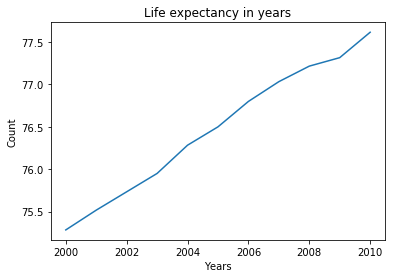

In [15]:
plt.plot(life_by_years.index,life_by_years.Life_expectancy)
plt.title("Life expectancy in years")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

И шесте дъражави за разглеждания период имат сходен ръст на продължителността на живота с около 2 години. Анализа, който смятам да направя е базиран на осредняването на съответните фактори по години.

In [16]:
mean_factors =economics_data.groupby(by="Country").mean()
mean_factors = mean_factors.sort_values(["Life_expectancy"])
mean_factors = mean_factors.drop("Year",axis=1)
mean_factors

,Agriculture,Urban_population,GDP,Industry,Services,Healthy_costs,CO2,Electricity,Under_five_mortality,Life_expectancy
Country,,,,,,,,,,
Romania,10.770296,52.836182,14088.181818,33.275262,55.954441,5.413138,4.261211,2269.738146,20.318182,72.336364
Bulgaria,9.051118,70.469455,12389.545455,29.067721,61.881161,7.101643,6.069750,4148.919747,16.372727,72.627273
"Macedonia, FYR",11.899363,59.175000,9504.727273,29.622886,58.477751,8.015954,5.589094,3212.454007,13.209091,73.890909
Germany,1.015428,73.401909,38678.272727,29.347771,69.636802,10.836965,9.737477,6990.995654,4.736364,79.318182
Austria,1.769870,66.584727,41083.363636,29.576057,68.654072,10.323650,8.335182,7835.462885,4.900000,79.527273
Switzerland,1.305495,73.469545,51561.636364,27.211189,71.483315,10.949081,5.463182,8145.528204,5.081818,81.163636


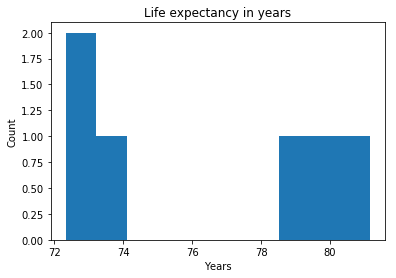

In [17]:
plt.hist(mean_factors.Life_expectancy)
plt.title("Life expectancy in years")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

Горната графика много ясно показва две групи държави с разлика в продължителността на живота от около 8 години. В първата група попадат България, Румъния и Македония, а в другата Германия, Австрия и Швейцария.

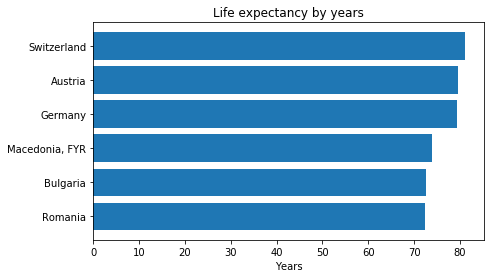

In [18]:
plt.figure(figsize = (7, 4))
plt.title("Life expectancy by years")
plt.xlabel("Years")
plt.barh(range(len(mean_factors.Life_expectancy)), mean_factors.Life_expectancy)
plt.yticks(list(range(len(mean_factors.Life_expectancy))), mean_factors.index)
plt.show()

In [19]:
mean_factors

,Agriculture,Urban_population,GDP,Industry,Services,Healthy_costs,CO2,Electricity,Under_five_mortality,Life_expectancy
Country,,,,,,,,,,
Romania,10.770296,52.836182,14088.181818,33.275262,55.954441,5.413138,4.261211,2269.738146,20.318182,72.336364
Bulgaria,9.051118,70.469455,12389.545455,29.067721,61.881161,7.101643,6.069750,4148.919747,16.372727,72.627273
"Macedonia, FYR",11.899363,59.175000,9504.727273,29.622886,58.477751,8.015954,5.589094,3212.454007,13.209091,73.890909
Germany,1.015428,73.401909,38678.272727,29.347771,69.636802,10.836965,9.737477,6990.995654,4.736364,79.318182
Austria,1.769870,66.584727,41083.363636,29.576057,68.654072,10.323650,8.335182,7835.462885,4.900000,79.527273
Switzerland,1.305495,73.469545,51561.636364,27.211189,71.483315,10.949081,5.463182,8145.528204,5.081818,81.163636


In [20]:
mean_factors.corr()

,Agriculture,Urban_population,GDP,Industry,Services,Healthy_costs,CO2,Electricity,Under_five_mortality,Life_expectancy
Agriculture,1.000000,-0.762545,-0.957920,0.564820,-0.967586,-0.899103,-0.693400,-0.964972,0.908310,-0.945660
Urban_population,-0.762545,1.000000,0.666390,-0.853625,0.867257,0.777869,0.596132,0.793495,-0.729141,0.681802
GDP,-0.957920,0.666390,1.000000,-0.576346,0.937671,0.878360,0.483088,0.951530,-0.882542,0.974089
Industry,0.564820,-0.853625,-0.576346,1.000000,-0.754914,-0.764107,-0.318801,-0.715558,0.705016,-0.646184
Services,-0.967586,0.867257,0.937671,-0.754914,1.000000,0.948388,0.648631,0.985879,-0.937621,0.949300
Healthy_costs,-0.899103,0.777869,0.878360,-0.764107,0.948388,1.000000,0.694034,0.943320,-0.993858,0.956017
CO2,-0.693400,0.596132,0.483088,-0.318801,0.648631,0.694034,1.000000,0.628530,-0.724183,0.574862
Electricity,-0.964972,0.793495,0.951530,-0.715558,0.985879,0.943320,0.628530,1.000000,-0.947192,0.963683
Under_five_mortality,0.908310,-0.729141,-0.882542,0.705016,-0.937621,-0.993858,-0.724183,-0.947192,1.000000,-0.960442
Life_expectancy,-0.945660,0.681802,0.974089,-0.646184,0.949300,0.956017,0.574862,0.963683,-0.960442,1.000000


Summary: Резултата от анализа ясно показва, че по-ниските разходи отделяни за здравеопазване от страна на държавата, съчетани с по-висок дял на индустриализация и селско стопанство от БВП, води до намаляване на продължителността на живота.

## II. How do our choices in food and drinks affect our overall health?

### 1. Read data. 

In [21]:
factors_data = None


In [22]:
add_to_factors_data("FoodAndDrink/food_consumption.xlsx")
add_to_factors_data("FoodAndDrink/sugar_consumption.xlsx")
add_to_factors_data("FoodAndDrink/blood_pressure_female.xlsx")
add_to_factors_data("FoodAndDrink/blood_pressure_male.xlsx")
add_to_factors_data("FoodAndDrink/bmi_female.xlsx")
add_to_factors_data("FoodAndDrink/bmi_male.xlsx")
add_to_factors_data("FoodAndDrink/cholesterol_female.xlsx")
add_to_factors_data("FoodAndDrink/cholesterol_male.xlsx")
factors_data = factors_data[(factors_data.Year >= 2000) & (factors_data.Country.isin(country_list))]
factors_data

,Country,Year,Food_v,Shugar_v,"SBP female (mm Hg), age standardized mean_v","SBP male (mm Hg), age standardized mean_v",BMI female_v,BMI male_v,"TC female (mmol/L), age standardized mean_v","TC male (mmol/L), age standardized mean_v"
10115,Austria,2000,3809.10,126.03,126.5802,132.7926,24.75430,25.87471,5.429332,5.481236
10133,Bulgaria,2000,2815.11,76.71,129.6648,133.8580,25.21212,25.84258,5.128668,5.082261
10183,Germany,2000,3432.82,115.07,129.0619,136.4049,25.51645,26.67425,5.669543,5.764630
10233,"Macedonia, FYR",2000,2806.25,95.89,130.8507,133.2276,25.12430,25.74675,4.966338,4.869627
10285,Romania,2000,3177.61,68.49,129.6162,132.9295,24.88057,24.68514,5.007430,4.970472
10320,Switzerland,2000,3434.76,153.43,122.4611,131.1266,24.03658,25.80709,5.403825,5.462165
10374,Austria,2001,3816.93,123.29,126.2368,132.5685,24.79874,25.93806,5.404716,5.457598
10392,Bulgaria,2001,2772.77,79.45,129.4689,133.8393,25.22311,25.89594,5.113754,5.066823
10442,Germany,2001,3477.81,126.03,128.5426,136.0065,25.54752,26.72962,5.632502,5.740538
10492,"Macedonia, FYR",2001,2700.22,106.85,130.7118,133.2303,25.14507,25.79818,4.948735,4.850503


In [23]:
factors_data.columns = ["Country", "Year", "Food","Shugar", "Blood_pressure_f","Blood_pressure_m","BMI_f", 
                        "BMI_m","Cholesterol_f", "Cholesterol_m"]

Short description of what each column means:

* Country - name of country
* Year - years with data for exploration
* Food - The total supply of food available in a country, divided by the population and 365 (the number of days in the year).
* Shugar - Sugar per person (g per day)
* Blood_pressure_f - SBP female (mm Hg), age standardized mean
* Blood_pressure_m - SBP male (mm Hg), age standardized mean
* BMI_f - BMI (Body Mass Index) of the female population
* BMI_m - BMI (Body Mass Index) of the male population
* Cholesterol_f - Total Cholesterol female (mmol/L), age standardized mean
* Cholesterol_m - Total Cholesterol male (mmol/L), age standardized mean


In [24]:
factors_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 10115 to 12345
Data columns (total 10 columns):
Country             54 non-null object
Year                54 non-null int64
Food                48 non-null float64
Shugar              30 non-null float64
Blood_pressure_f    54 non-null float64
Blood_pressure_m    54 non-null float64
BMI_f               54 non-null float64
BMI_m               54 non-null float64
Cholesterol_f       54 non-null float64
Cholesterol_m       54 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 4.6+ KB


Типовете на колоните са ок, липсва6тите данни също няма да създадът проблем. тъй като аз ще работя с осреднените им стоиности.

In [25]:
mean_factors_foods_and_drinks = factors_data.groupby(by="Country").mean()
mean_factors_foods_and_drinks = mean_factors_foods_and_drinks.drop("Year",axis=1)
mean_factors_foods_and_drinks

,Food,Shugar,Blood_pressure_f,Blood_pressure_m,BMI_f,BMI_m,Cholesterol_f,Cholesterol_m
Country,,,,,,,,
Austria,3760.06500,123.290,125.316311,132.028856,24.919819,26.152149,5.342036,5.386051
Bulgaria,2773.19000,78.902,129.062333,133.937722,25.340788,26.146623,5.075188,5.026716
Germany,3501.64250,122.742,126.959389,134.661478,25.625601,26.908590,5.516690,5.664852
"Macedonia, FYR",2881.99375,103.014,130.362111,133.559722,25.228790,26.016001,4.913681,4.816858
Romania,3399.10375,70.134,129.181944,133.016867,25.042136,24.998651,4.943386,4.915173
Switzerland,3410.13500,159.998,120.972356,130.764289,24.051291,25.991362,5.312251,5.371490


#### To the created table, it is necessary to add the average life expectancy from the previous analysis.


In [26]:
mean_factors_foods_and_drinks["Life_expectancy"] = mean_factors["Life_expectancy"]
mean_factors_foods_and_drinks

,Food,Shugar,Blood_pressure_f,Blood_pressure_m,BMI_f,BMI_m,Cholesterol_f,Cholesterol_m,Life_expectancy
Country,,,,,,,,,
Austria,3760.06500,123.290,125.316311,132.028856,24.919819,26.152149,5.342036,5.386051,79.527273
Bulgaria,2773.19000,78.902,129.062333,133.937722,25.340788,26.146623,5.075188,5.026716,72.627273
Germany,3501.64250,122.742,126.959389,134.661478,25.625601,26.908590,5.516690,5.664852,79.318182
"Macedonia, FYR",2881.99375,103.014,130.362111,133.559722,25.228790,26.016001,4.913681,4.816858,73.890909
Romania,3399.10375,70.134,129.181944,133.016867,25.042136,24.998651,4.943386,4.915173,72.336364
Switzerland,3410.13500,159.998,120.972356,130.764289,24.051291,25.991362,5.312251,5.371490,81.163636


In [27]:
mean_factors_foods_and_drinks.corr()

,Food,Shugar,Blood_pressure_f,Blood_pressure_m,BMI_f,BMI_m,Cholesterol_f,Cholesterol_m,Life_expectancy
Food,1.000000,0.469685,-0.566843,-0.404802,-0.275502,0.061638,0.649334,0.674128,0.690044
Shugar,0.469685,1.000000,-0.876795,-0.591483,-0.609335,0.481120,0.689257,0.672337,0.942208
Blood_pressure_f,-0.566843,-0.876795,1.000000,0.778857,0.793521,-0.195980,-0.647249,-0.642257,-0.868695
Blood_pressure_m,-0.404802,-0.591483,0.778857,1.000000,0.969955,0.351872,-0.084796,-0.075237,-0.498449
BMI_f,-0.275502,-0.609335,0.793521,0.969955,1.000000,0.344320,-0.053708,-0.050599,-0.467623
BMI_m,0.061638,0.481120,-0.195980,0.351872,0.344320,1.000000,0.735961,0.702227,0.542617
Cholesterol_f,0.649334,0.689257,-0.647249,-0.084796,-0.053708,0.735961,1.000000,0.996680,0.863765
Cholesterol_m,0.674128,0.672337,-0.642257,-0.075237,-0.050599,0.702227,0.996680,1.000000,0.853577
Life_expectancy,0.690044,0.942208,-0.868695,-0.498449,-0.467623,0.542617,0.863765,0.853577,1.000000


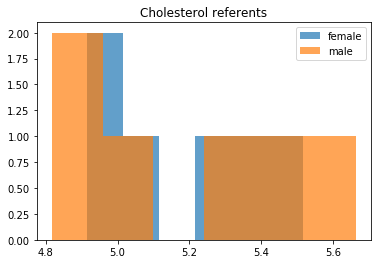

In [28]:
plt.hist(mean_factors_foods_and_drinks.Cholesterol_f,bins=6, alpha = 0.7, label= "female")
plt.hist(mean_factors_foods_and_drinks.Cholesterol_m, bins=6, alpha = 0.7, label = "male")
plt.title("Cholesterol referents")
plt.legend()
plt.show()

Съгласно [Wikipedia](https://bg.wikipedia.org/wiki/%D0%A5%D0%BE%D0%BB%D0%B5%D1%81%D1%82%D0%B5%D1%80%D0%BE%D0%BB), границите които трябва да бъдат поддържани за нивата на холестерола,  трябва да са под 5.2, а както виждаме, стойностите на западните държави са над тази стойност. Както казват старите хора, този врат не е от туршия. :) Както се вижда от графиките по-долу същите три развити западни държави консумират повече храни и захар, което е свързано с по-високите нива на холестерола.

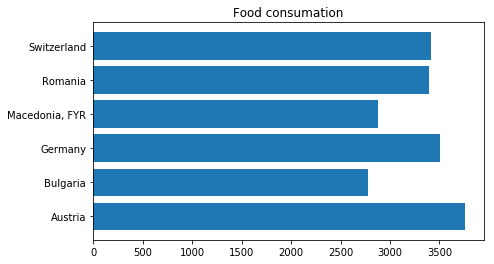

In [29]:
plt.figure(figsize = (7, 4))
plt.title("Food consumation")
plt.barh(range(len(mean_factors_foods_and_drinks.Food)), mean_factors_foods_and_drinks.Food)
plt.yticks(list(range(len(mean_factors_foods_and_drinks.Food))), mean_factors_foods_and_drinks.index)
plt.show()



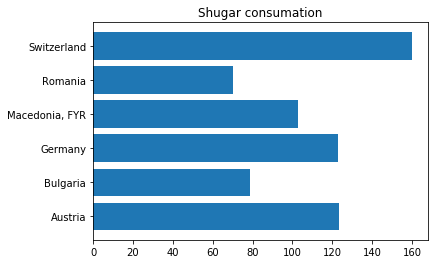

In [30]:
plt.barh(mean_factors_foods_and_drinks.index,mean_factors_foods_and_drinks.Shugar)
plt.title("Shugar consumation")
plt.show()

От всичко казано дотук, излиза че за продължителността на живота на една нация, не са най-важни стойностите на холестерола, а това хората и да се хранят добре, да си доставят наслади и да имат добро здравеопазване.

## III. How do eating habits of US people influence their health?

The survey results are located [here](https://www.kaggle.com/bls/eating-health-module-dataset/data). Here i want to understand if weigh affect the status of the person.

### 1. Reading data.

In [31]:
healt_data = pd.read_csv("ehresp_2014.csv")
healt_data.head()

,tucaseid,tulineno,eeincome1,erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,...,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1
0,20140101140007,1,-2,33.200001,1,-1,-1,30,2,0,...,1,2,1,-1,2,1,2,170,1,2
1,20140101140011,1,1,22.700001,3,1,-1,45,14,0,...,1,2,1,-1,1,2,2,128,2,0
2,20140101140028,1,2,49.400002,3,5,-1,60,0,0,...,-1,-1,2,2,-1,-1,-1,270,2,12
3,20140101140063,1,-2,-1.000000,3,-1,-1,0,0,0,...,2,2,1,1,2,6,-1,-2,2,2
4,20140101140168,1,2,31.000000,3,5,-1,65,0,0,...,1,2,1,2,1,1,2,210,1,0


In [32]:
healt_data.euwgt.unique()

array([170, 128, 270,  -2, 210, 220, 200, 155, 180, 282, 125, 235, 176,
       198, 132, 164, 205,  -3, 160, 135, 260, 159, 130, 201, 175, 105,
       189, 178, 190, 110, 145, 124, 150, 185, 165, 169, 100, 127, 237,
       250, 202,  -5, 187, 230, 232, 114, 240, 120, 212, 186, 140, 142,
       138, 215, 168, 115, 152, 131, 147, 225, 245, 197, 143, 290, 104,
       167, 122,  98, 192, 148, 222, 172, 134, 218, 157, 116, 223, 146,
       113, 126, 319, 195, 121, 265, 287, 246, 213, 151, 283, 163, 118,
       183, 206, 106, 238, 272, 229, 119, 153, 280, 107, 310, 129, 275,
       144, 258, 286, 193, 112, 137, 158, 285, 108, 184, 162, 340, 323,
       322, 255, 253, 226, 156, 209, 173, 149, 174, 133, 141, 194, 182,
       188, 214, 216, 243, 330, 123, 298, 217, 117, 276, 300, 139, 320,
       219, 199, 109, 136, 181, 177, 295, 204, 154, 224, 231, 315, 196,
       236, 103, 191, 203, 254, 166, 207, 161, 227, 239, 292, 228, 278,
       274, 263, 102, 267, 264, 211, 252, 335, 251, 221, 242, 31

### Short description of what each column means:

* TUCASEID - identifies each household
* EUFINLWGT - statistical weight
* EUGENHTH - general health status
* EUEAT-Were there any times you were eating any meals or snacks yesterday, for example while you were doing something else? 1-Yes, 2-No
* EUWGT - How much do you weigh without shoes? (in pounds)


In [33]:
healt_data = healt_data[['tucaseid', 'eufinlwgt',  'eueat', 'euwgt','eugenhth']]
healt_data.head()

,tucaseid,eufinlwgt,eueat,euwgt,eugenhth
0,20140101140007,5202086.0,1,170,1
1,20140101140011,29400000.0,1,128,2
2,20140101140028,26000000.0,2,270,5
3,20140101140063,2728880.0,2,-2,2
4,20140101140168,17500000.0,2,210,4


### 2. Data tyding and cleaning.

In [34]:
healt_data.groupby("eugenhth").size()


eugenhth
-3      29
-2      36
-1      19
 1    2017
 2    3757
 3    3491
 4    1367
 5     496
dtype: int64

To conduct the survey, I choose the categories of the "eugenhth" indicator. Its valid values are from 1 to 5, and due to her insignificant number i decide to remove rows with invalid entries.

In [35]:
healt_data = healt_data[healt_data.eugenhth >= 1]
healt_data["eugenhth"] = healt_data["eugenhth"].replace(1,"Excellent")
healt_data["eugenhth"] = healt_data["eugenhth"].replace(2,"Very good")
healt_data["eugenhth"] = healt_data["eugenhth"].replace(3,"Good")
healt_data["eugenhth"] = healt_data["eugenhth"].replace(4,"Fair")
healt_data["eugenhth"] = healt_data["eugenhth"].replace(5,"Poor")
healt_data["eugenhth"] = healt_data["eugenhth"].astype("category")

In [36]:
healt_data.groupby("eueat").size()

eueat
-3       2
-2      60
 1    6072
 2    4994
dtype: int64

I validate the "eueat" column by removing the insignificant lines and making it boolean.

In [37]:
healt_data = healt_data[healt_data["eueat"] > 0]
healt_data["eueat"] = healt_data["eueat"].replace(2,0)
healt_data["eueat"] = healt_data.eueat.astype(np.bool)


I validate the "euwgt" column by removing. Idecide valid pregnancy records not to include in the analyse.

In [38]:
healt_data = healt_data[(healt_data["euwgt"] >= 98) & (healt_data["euwgt"] <= 340)]

In [39]:
healt_data.head()

,tucaseid,eufinlwgt,eueat,euwgt,eugenhth
0,20140101140007,5202086.0,True,170,Excellent
1,20140101140011,29400000.0,True,128,Very good
2,20140101140028,26000000.0,False,270,Poor
4,20140101140168,17500000.0,False,210,Fair
5,20140101140559,3661280.0,True,220,Good


In [40]:
healt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10622 entries, 0 to 11211
Data columns (total 5 columns):
tucaseid     10622 non-null int64
eufinlwgt    10622 non-null float64
eueat        10622 non-null bool
euwgt        10622 non-null int64
eugenhth     10622 non-null category
dtypes: bool(1), category(1), float64(1), int64(2)
memory usage: 352.9 KB


In [41]:
weigh_data = healt_data.groupby(by="eugenhth").euwgt.mean()
weigh_data

eugenhth
Excellent    159.755922
Fair         190.925613
Good         184.148943
Poor         190.084211
Very good    170.675299
Name: euwgt, dtype: float64

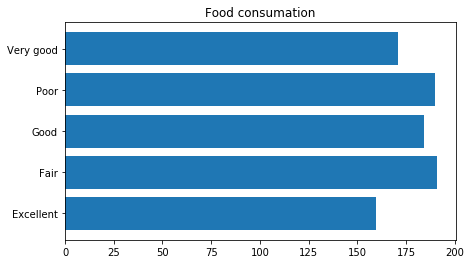

In [42]:
plt.figure(figsize = (7, 4))
plt.title("Food consumation")
plt.barh(range(len(weigh_data)), weigh_data)
plt.yticks(list(range(len(weigh_data))), weigh_data.index)
plt.show()

It is clearly shown, that higher weight contributes to making a person's status worse.

In [43]:
pd.crosstab(healt_data.eueat, healt_data.eugenhth)

eugenhth,Excellent,Fair,Good,Poor,Very good
eueat,,,,,
False,829,669,1529,258,1500
True,1113,635,1781,217,2091


In [44]:
eufinlwgt_coeficients = healt_data.groupby(by="eueat").eufinlwgt.mean()
eufinlwgt_coeficients

eueat
False    8.382631e+06
True     8.092310e+06
Name: eufinlwgt, dtype: float64

Even after weighing, it appears that doing something else has no effect on the status of a person.